In [2]:
# Notebook Styling
from IPython.core.display import HTML
def css_styling():
    sheet = '../css/custom.css'
    styles = open(sheet, "r").read() 
    return HTML(styles)
css_styling()

# Structuring Data Exercise: Numpy dtypes

Before looking at Python Classes and Objects, we motivate the need for structured data using some simple image data. In this exercise you will be prompted to fill in sections using what you now know about structuring data with dtypes.

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

# The image pixel size - constant for all images in this exercise
Nx = Ny = 72

## Portable Greymap ( `.pgm`) Format

You have been provided with some image files i.e. `img1, .. img4` in the `data` directory in *portable greymap* (.pgm) format. Although admittedly a primitive image format, `.pgm` files are simple to manipulate as they contain only one pixel grey value per $x, y$ pixel in the image: the scale runs from 0 (black) to 255 (white). This represents a common task in scientific computing where you must read in some field data on a grid of points. **You are provided with the code to read and reshape this data from a file!**

Here's a demonstration of a greymap image that might be stored in `.pgm` format using a simple gradient of white to black - it is displayed here using a contour plot:

[[ 255.          253.20422535  251.4084507  ...,  131.0915493   129.29577465
   127.5       ]
 [ 253.20422535  251.4084507   249.61267606 ...,  129.29577465  127.5
   125.70422535]
 [ 251.4084507   249.61267606  247.81690141 ...,  127.5         125.70422535
   123.9084507 ]
 ..., 
 [ 131.0915493   129.29577465  127.5        ...,    7.18309859
     5.38732394    3.5915493 ]
 [ 129.29577465  127.5         125.70422535 ...,    5.38732394    3.5915493
     1.79577465]
 [ 127.5         125.70422535  123.9084507  ...,    3.5915493     1.79577465
     0.        ]]


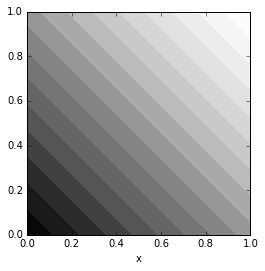

In [4]:
Nx = 72
Ny = 72
img_x = np.linspace(1, 0, Nx)
img_y = np.linspace(1, 0, Ny)
X, Y = np.meshgrid(img_x, img_y)

# Generate the gradient image - this could be stored in .pgm format!
img_z = (X+Y) * 255*0.5
print(img_z)


fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.contourf(img_x, img_y, img_z, 20, cmap=cm.Greys_r)
ax.set_xlabel('x')

## Task breakdown


Create a structured array of images in the next cell: for this we will need to define the `dtype` for the array. This should involve passing a list of length 3 as an argument to `np.dtype` defining the 3 data types required by elements (images) in the array:

1. An $x$ component - The array of regularly spaced pixels x values from 1 to 0 (image colour values in pgm files start from top right pixel). Array of type float64, length $Nx$.

2. A $y$ component - similar to $x$, but with length $Ny$

3. A $z$ component - the array of grey levels for each pixel in the image. Array of float64, shape ($Nx, Ny$)

In [ ]:
# Create the dtype
# dt = ...

# create a new zero'ed array of length 4 using your dtype
# imgs = ....

Now create the normalised x and y values between 1 and 0 - these are the same for each image.

*(Hint: Numpy linspace works backwards too ....)*

In [ ]:
# xs = ...
# ys = ...

Fill in the exercise in the next section to input $xs$ and $ys$ data. Also look at the format of the code: hopefully this is more readable and neater than creating separate unstructured arrays.

In [ ]:
# The image file names
names = ['img1.pgm', 'img2.pgm', 'img3.pgm', 'img4.pgm']
files = [os.path.join('data', name) for name in names]


for i, file in enumerate(files):
    # This reads in the color data (top 4 rows are headings)
    imgs['z'][i] = np.loadtxt(file, skiprows=4).reshape(Nx, Ny)
    
    # EXERCISE: Input x & y data in to the stuctured imgs array
    # ....

# A typical program would do something clever with the data here

# Visualisation: Notice we can iterate of imgs directly
for img in imgs:
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    ax.contourf(img['x'], img['y'], img['z'], cmap=cm.Greys_r)

For your entertainment, we'll sum the pixel value of those images and plot the (normalised) result:

In [ ]:
combined = np.zeros(1, dtype=dt)
(combined['x'][0], combined['y'][0]) = (xs, ys)

for img in imgs:
    combined['z'][0] += img['z']

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.contourf(combined['x'][0], combined['y'][0], combined['z'][0], cmap=cm.Greys_r)

## [Solutions](../soln/03-dtypes.ipynb)